In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fitter import Fitter

from scipy.stats import pearsonr, kruskal

import html
import warnings

In [122]:
warnings.filterwarnings("ignore")

In [169]:
!pip install fitter

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ------------------------- -------------- 61.4/97.9 kB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 71.7/97.9 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 97.9/97.9 kB 804.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/302.2 kB 1

# Anime Dataset

## Importation et description des données

In [123]:
anime_df = pd.read_csv(r'../data/anime.csv', encoding='utf-8')

anime_df = anime_df.applymap(lambda x: html.unescape(x) if isinstance(x, str) else x)
anime_df.head(20)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama': Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [124]:
anime_df.shape

(12294, 7)

In [125]:
anime_df.columns.tolist()

['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']

In [126]:
anime_df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [127]:
anime_df_unique = {
    col: anime_df[col].unique().tolist()
    for col in anime_df[['type', 'genre']].columns
}

anime_df_unique

{'type': ['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan],
 'genre': ['Drama, Romance, School, Supernatural',
  'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
  'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
  'Sci-Fi, Thriller',
  'Comedy, Drama, School, Shounen, Sports',
  'Action, Adventure, Shounen, Super Power',
  'Drama, Military, Sci-Fi, Space',
  'Drama, Fantasy, Romance, Slice of Life, Supernatural',
  'Drama, School, Shounen',
  'Action, Drama, Mecha, Military, Sci-Fi, Super Power',
  'Adventure, Drama, Supernatural',
  'Drama, Music, Romance, School, Shounen',
  'Adventure, Fantasy, Historical, Mystery, Seinen, Slice of Life, Supernatural',
  'Fantasy, Slice of Life',
  'Action, Mecha, Military, School, Sci-Fi, Super Power',
  'Comedy, Drama, Shounen, Sports',
  'Action, Drama, Historical, Martial Arts, Romance, Samurai',
  'Action, Adventure, Comedy, Drama, Sci-Fi, Space',
  'Action, Comedy, Parody, Sci-Fi, Seinen, Super Power, Superna

In [128]:
unknown_number_episodes = anime_df[anime_df == "Unknown"].count()

missing_rate = pd.DataFrame({
                             'count': (anime_df.isna().sum() + unknown_number_episodes),
                             'rate': (anime_df.isna().sum() * 100 / anime_df.shape[0]) 
                                      + (unknown_number_episodes * 100 / anime_df.shape[0])
                             }).sort_values(by = 'rate', ascending = False)
missing_rate

,count,rate
episodes,340,2.765577
rating,230,1.870831
genre,62,0.504311
type,25,0.203351
anime_id,0,0.000000
name,0,0.000000
members,0,0.000000


In [129]:
nan_ratings = anime_df[anime_df.rating.isna()]
nan_ratings

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [130]:
anime_df[anime_df.duplicated()]

,anime_id,name,genre,type,episodes,rating,members


In [131]:
anime_df.dropna(inplace=True)
anime_df.drop(anime_df.loc[anime_df.episodes == 'Unknown'].index, inplace=True)

anime_df.episodes = anime_df.episodes.astype(int)

### Calcul des variables de rang par popularité et par note moyenne

In [132]:
anime_df.rating_rank = anime_df.rating.rank(ascending=False, method="min")
anime_df.members_rank = anime_df.members.rank(ascending=False, method="min")

### Détection des anomalies (notes anormalement trop hautes ou basses)

## Analyse descriptive et exploratoire genre par genre

In [133]:
exploded_genre_df = anime_df.assign(unique_genre=anime_df['genre'].str.split(", ")).explode('unique_genre')
exploded_genre_df.reset_index(inplace=True)
exploded_genre_df.drop(columns='index', inplace=True)
exploded_genre_df.unique_genre

0               Drama
1             Romance
2              School
3        Supernatural
4              Action
             ...     
35196          Hentai
35197          Hentai
35198          Hentai
35199          Hentai
35200          Hentai
Name: unique_genre, Length: 35201, dtype: object

In [144]:
exploded_genre_df[exploded_genre_df['unique_genre'] == genre].isnull().values.any()

False

In [134]:
anime_genre_counts = exploded_genre_df.unique_genre.value_counts()
anime_genre_counts

unique_genre
Comedy           4483
Action           2748
Adventure        2293
Fantasy          2219
Sci-Fi           2028
Drama            1972
Shounen          1669
Kids             1550
Romance          1436
Slice of Life    1180
School           1164
Hentai           1099
Supernatural      993
Mecha             927
Music             832
Historical        787
Magic             742
Ecchi             627
Shoujo            587
Seinen            530
Sports            527
Mystery           482
Super Power       445
Military          415
Parody            397
Space             376
Horror            360
Harem             312
Demons            287
Martial Arts      258
Dementia          238
Psychological     226
Police            194
Game              170
Samurai           145
Vampire           100
Thriller           86
Cars               71
Shounen Ai         62
Shoujo Ai          54
Josei              52
Yuri               41
Yaoi               37
Name: count, dtype: int64

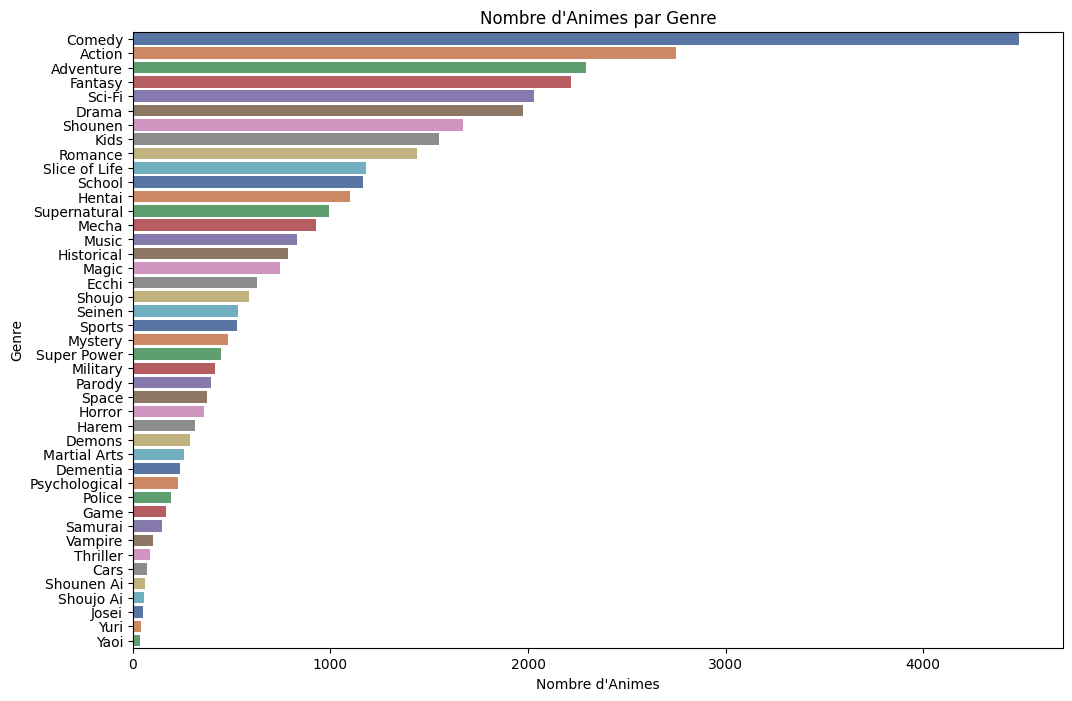

In [135]:
genre_counts = anime_genre_counts.reset_index()

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='count', y='unique_genre', data=genre_counts, ci=None, palette='deep')
plt.title('Nombre d\'Animes par Genre')
plt.xlabel('Nombre d\'Animes')
plt.ylabel('Genre')
plt.show()

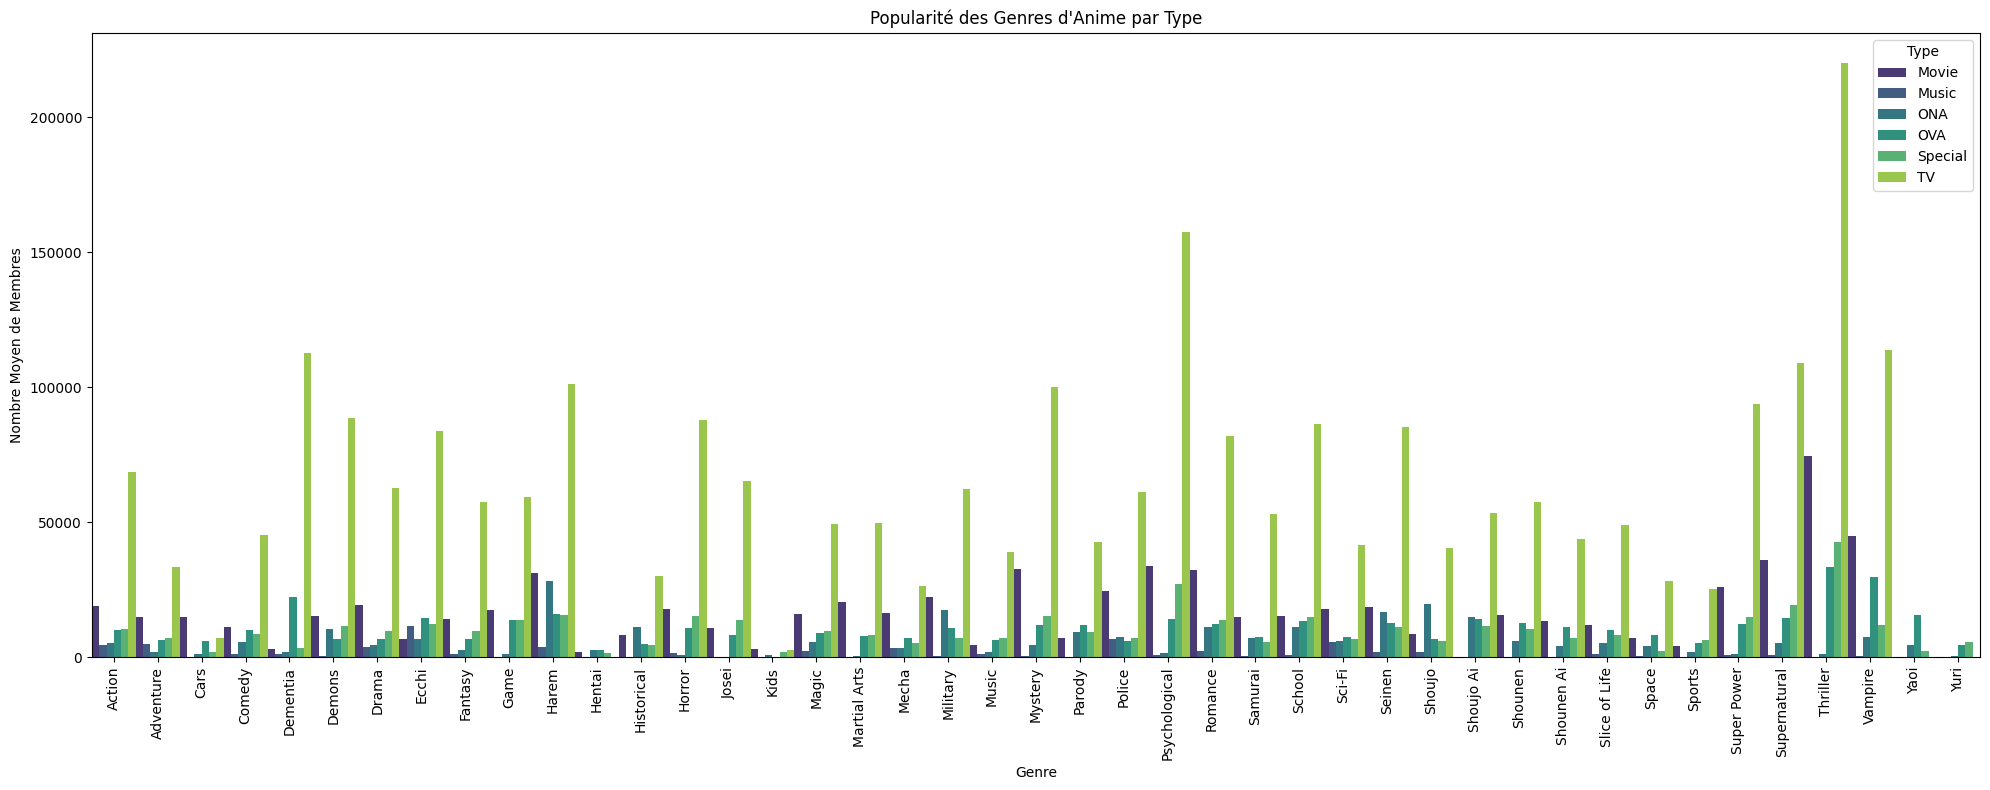

In [168]:
grouped_data = exploded_genre_df.groupby(['unique_genre', 'type'])['members'].mean().reset_index()

plt.figure(figsize=(20, 8))
sns.barplot(data=grouped_data, x='unique_genre', y='members', hue='type', palette='viridis', width=1)

plt.xticks(rotation=90)
plt.title('Popularité des Genres d\'Anime par Type')
plt.xlabel('Genre')
plt.ylabel('Nombre Moyen de Membres')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

In [62]:
single_genre = anime_df[anime_df.genre.str.count(",") == 0]
single_genre_counts = single_genre.genre.value_counts()
single_genre_counts

genre
Hentai           823
Comedy           523
Music            301
Kids             199
Dementia         137
Fantasy          114
Drama            107
Slice of Life     99
Adventure         79
Historical        68
Action            53
Sports            44
Sci-Fi            43
Magic             22
Ecchi             21
Horror            21
Mecha             20
Mystery           19
Romance           15
Supernatural      14
Psychological     13
Game              11
School            10
Shoujo             9
Shounen            9
Parody             6
Cars               5
Seinen             4
Yaoi               3
Harem              2
Samurai            2
Military           2
Demons             2
Thriller           1
Martial Arts       1
Vampire            1
Space              1
Name: count, dtype: int64

In [63]:
df_expanded = anime_df.drop("genre", axis=1).join(
    anime_df.genre
    .str.split(", ", expand=True)
    .stack()
    .reset_index(level=1, drop=True)
    .rename("genre")
)
stats_par_genre = df_expanded.groupby("genre").agg(
    {
        "rating": ["mean", "count"],
        "members": "sum",
    }
)
stats_par_genre.columns = [
    "rating_moyen",
    "nombre_notes",
    "membres_somme",
]

stats_par_genre["membres_somme"] = stats_par_genre["membres_somme"].round(1)
stats_par_genre["genre_rating_rank"] = stats_par_genre["rating_moyen"].rank(
    ascending=False, method="min"
)
stats_par_genre["genre_members_rank"] = stats_par_genre["membres_somme"].rank(
    ascending=False, method="min"
)
stats_par_genre["genre_rating_rank"] = stats_par_genre["genre_rating_rank"].astype(int)
stats_par_genre["genre_members_rank"] = stats_par_genre["genre_members_rank"].astype(
    int
)

stats_par_genre.sort_values(by="rating_moyen", ascending=False)

,rating_moyen,nombre_notes,membres_somme,genre_rating_rank,genre_members_rank
genre,,,,,
Josei,7.443077,52,2213791,1,37
Thriller,7.382326,86,10133530,2,24
Mystery,7.232412,485,26877898,3,12
Police,7.122051,195,4893278,4,33
Shounen,7.057553,1684,54115368,5,8
Psychological,7.010398,226,17211633,6,18
Military,7.004904,416,12226177,7,22
Supernatural,7.000380,1001,57008004,8,6
Romance,6.999054,1437,65663654,9,3


### Tests paramétriques et non paramétriques 

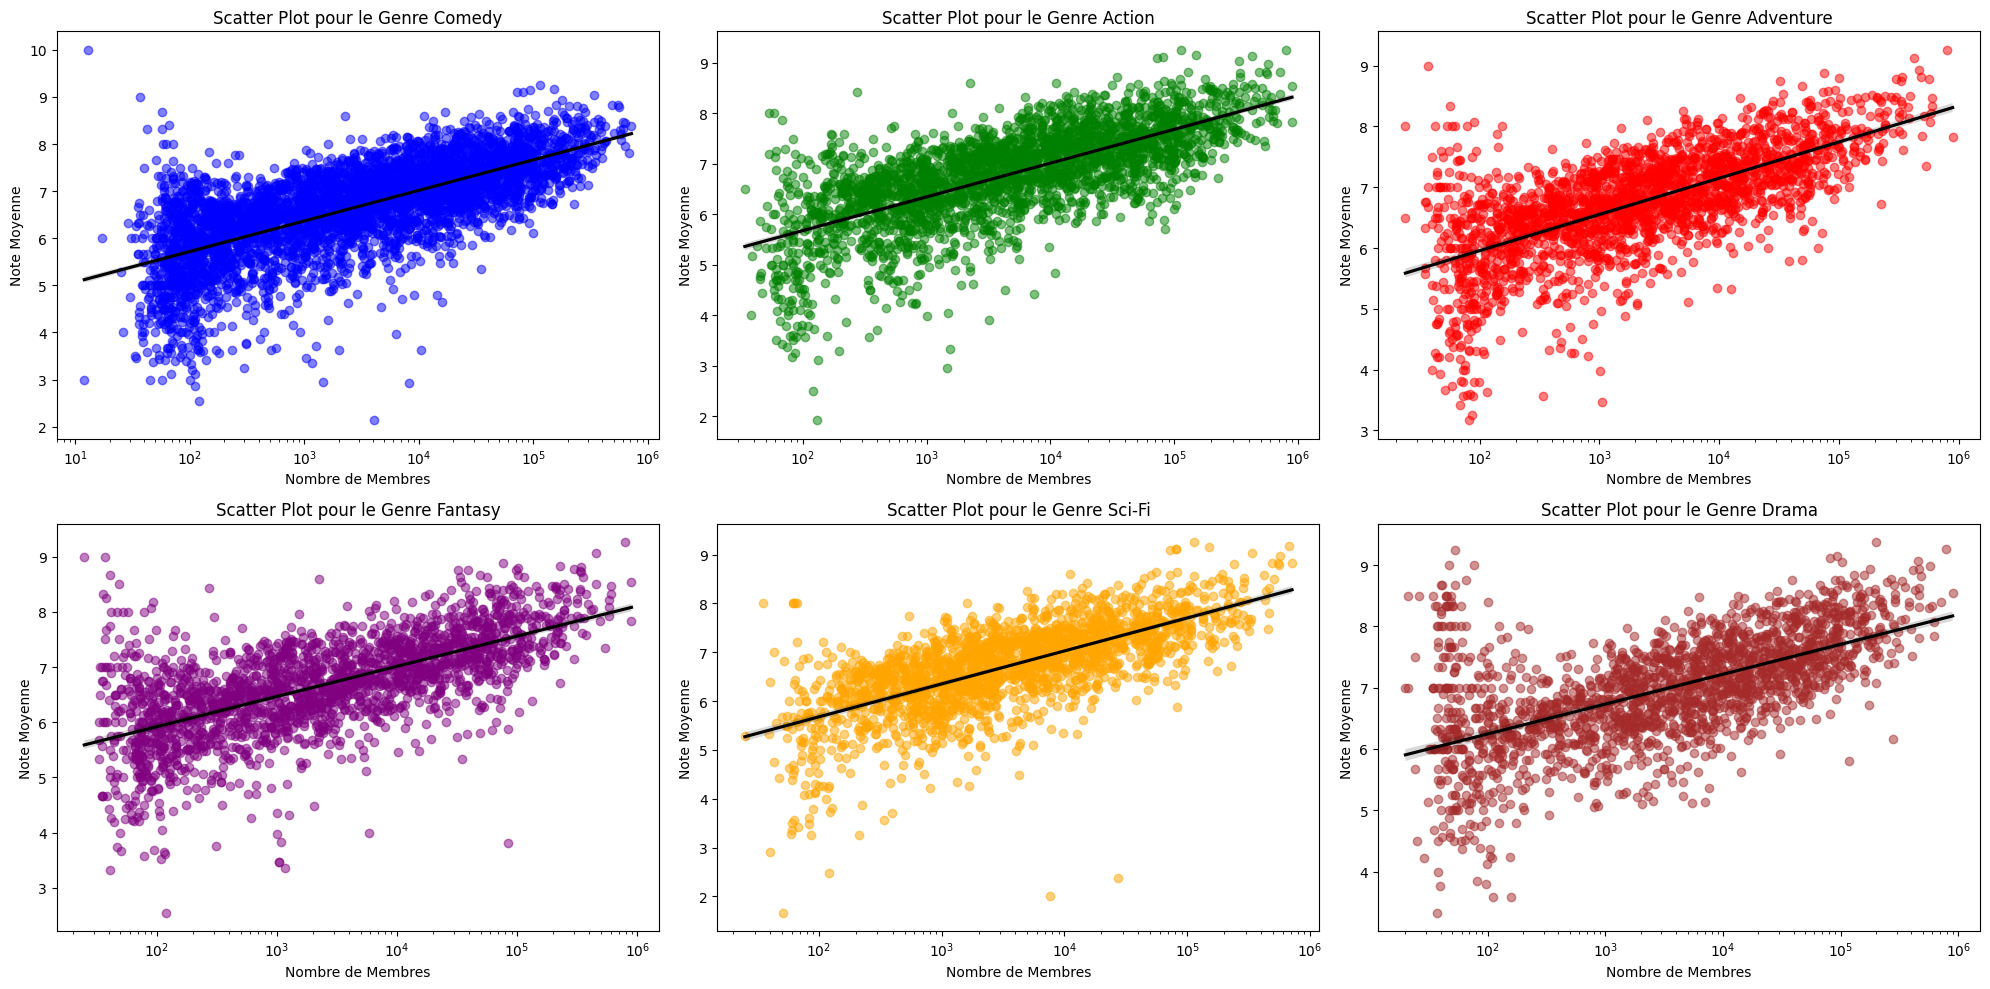

In [137]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axes = axes.flatten()

top_genres = exploded_genre_df['unique_genre'].value_counts().nlargest(6).index.tolist()

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for i, genre in enumerate(top_genres):
    genre_df = exploded_genre_df[exploded_genre_df['unique_genre'] == genre]
    sns.regplot(ax=axes[i], data=genre_df, x='members', y='rating', 
                scatter_kws={'color': colors[i], 'alpha': 0.5},
                line_kws={'color': 'black'},
                logx=True)
    axes[i].set_title(f'Scatter Plot pour le Genre {genre}')
    axes[i].set_xlabel('Nombre de Membres')
    axes[i].set_ylabel('Note Moyenne')
    axes[i].set_xscale('log')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [148]:
columns_to_correlate = top_genres

correlation_with_rating = pd.DataFrame({
    'Genre': columns_to_correlate,
    'Correlation coefficient between the popularity and the rating': [
        pearsonr(exploded_genre_df[exploded_genre_df['unique_genre'] == genre]['members'],
                 exploded_genre_df[exploded_genre_df['unique_genre'] == genre]['rating'])[0]
        for genre in columns_to_correlate
    ]
})

correlation_with_rating_sorted = correlation_with_rating.sort_values(
    by='Correlation coefficient between the popularity and the rating',
    ascending=False
)

correlation_with_rating_sorted.reset_index(drop=True, inplace=True)
correlation_with_rating_sorted

,Genre,Correlation coefficient between the popularity and the rating
0,Drama,0.424566
1,Fantasy,0.420445
2,Action,0.417384
3,Sci-Fi,0.414145
4,Comedy,0.413826
5,Adventure,0.390236


SKIPPED gaussian distribution (taking more than 30 seconds)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
t,0.096026,743.939961,769.346450,inf,0.025133,9.493936e-20
dweibull,0.128443,740.804210,766.210699,inf,0.026818,1.993636e-22
norm,0.144145,889.505765,906.443424,inf,0.049458,2.869888e-75
f,0.151942,896.607136,930.482455,inf,0.050586,1.005179e-78
chi2,0.190113,946.615075,972.021564,inf,0.058736,5.274604e-106


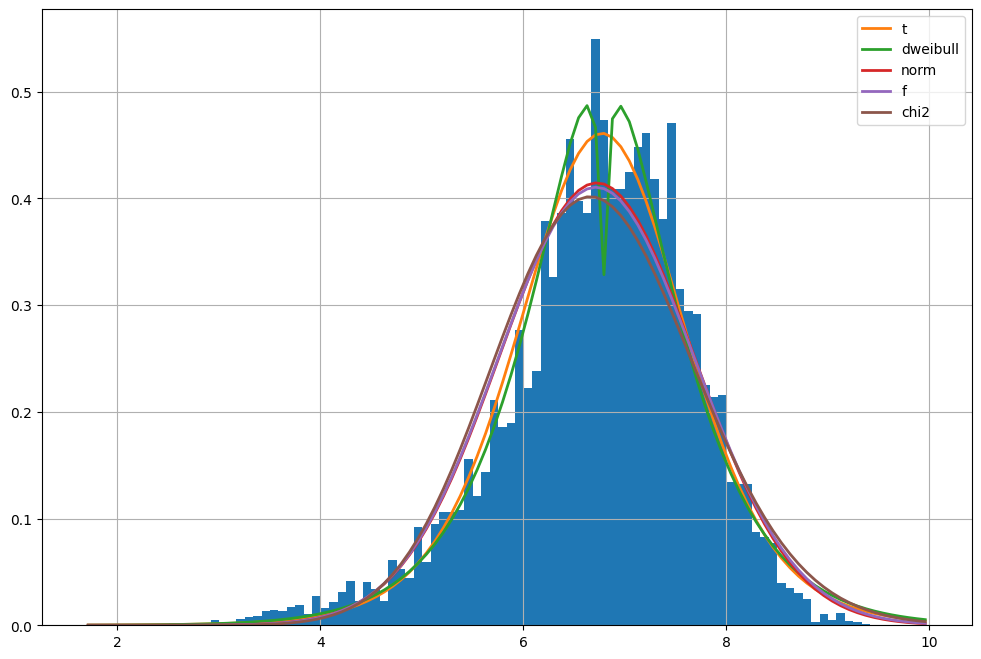

In [171]:
distribution_M2 = ["gaussian", "norm", "chi2", "cauchy", "expon", "f", "t", "gamma", "beta", "pareto", "uniform", "dweibull"]
f = Fitter(exploded_genre_df.rating, distributions=distribution_M2)
f.fit()

plt.figure(figsize=(12, 8))
plt.title('Distribution théorique et empirique des Notes')
f.summary()

In [189]:
unique_types = exploded_genre_df.type.unique().tolist()

genre_data = [exploded_genre_df[exploded_genre_df['unique_genre'] == anime_genre]['rating'] for anime_genre in top_genres]
type_data = [exploded_genre_df[exploded_genre_df['type'] == anime_type]['rating'] for anime_type in unique_types]

genre_stat, genre_p_value = kruskal(*genre_data)
type_stat, type_p_value = kruskal(*type_data)

kruskal_results = pd.DataFrame({
    'Variable': ['genre', 'type'],
    'Statistic': [genre_stat, type_stat],
    'p-value': [genre_p_value, type_p_value],
    'Rejection': [genre_p_value < .05, type_p_value < .05]
})

kruskal_results

,Variable,Statistic,p-value,Rejection
0,genre,188.956038,6.530619e-39,True
1,type,4146.438120,0.000000e+00,True


# Rating Dataset

In [11]:
rating_df = pd.read_csv(r'../data/rating.csv')
rating_df.head(20)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1
